## Assignment: Homework 5
## Name: Kiran Venkata Palla
## Net Id: kvp246

##GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer a woman job candidate, given what I would offer a man for the same job?)

In [1]:
# Loading the required libraries
%pylab inline
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
import json
import os
import urllib2
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp

# Using the matplotlib customizing file
jsonFile = urllib2.urlopen('https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json')
s = json.load(jsonFile)
plt.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


C:\Users\kiran.pv\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

unfortunately a lot of the links that i originally used a few weeks ago are broken now. I posted the data I had used on the class webpage here (together with data for the buildings & energy homework): http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data

In [2]:
#to use the url just pas it to pandas read_excel
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"

#split your data by male and female, for example you can load the data into 2 disctionary. other variables may be relevant: for example race.
#the names are not informative, and i am not giving you any meta data to find out what is in each file. 
# 08_2 files are male, 08_3 are female, and I am leaving in the lines of code that read the male files into races

# Reading males related excel files
allmales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

# Reading females related excel files
allfemales={}
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls',header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

##exploratory phase

In [3]:
#lest see what is in the data
#from pandas.tools.plotting import scatter_matrix
#scatter_matrix(allmales['all'], s=50, figsize=(16, 16), diagonal='kde')

#like for the building homework: this fails cause the data is not parsed and formatted propoerly
#so maybe just print the columns to find out
print allmales['all'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 49 columns):
Characteristic          48 non-null object
Total with Income       46 non-null float64
$1 to $2,499 or loss    46 non-null float64
$2,500 to $4,999        46 non-null float64
$5,000 to $7,499        46 non-null float64
$7,500 to $9,999        46 non-null float64
$10,000 to $12,499      46 non-null float64
$12,500 to $14,999      46 non-null float64
$15,000 to $17,499      46 non-null float64
$17,500 to $19,999      46 non-null float64
$20,000 to $22,499      46 non-null float64
$22,500 to $24,999      46 non-null float64
$25,000 to $27,499      46 non-null float64
$27,500 to $29,999      46 non-null float64
$30,000 to $32,499      46 non-null float64
$32,500 to $34,999      46 non-null float64
$35,000 to $37,499      46 non-null float64
$37,500 to $39,999      46 non-null float64
$40,000 to $42,499      46 non-null float64
$42,500 to $44,999      46 non-null float64
$45,000 to $47,499

> _**From the above output, we can notice that columns like Median income, Mean Income etc are under object data type that implies presence of non-real values and these values also makes the scatter matrix output to omit these columns.**_

In [4]:
#Another way to remove non real entries, is to use the np.isreal command, 
#i end up doing it in a for loop, which is ugly.
#think about how you could improve on that if you already have coding experience
#and are used to pythonic ways!
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

C:\Users\kiran.pv\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


now you can try again with the scatter matrix and see if there are any insightful correlations. 
please  make and comment the plot


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000021D28358>,
        ...,
        ...,
        ...,
       ..., 
        ...,
        ...,
        ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000AD5A6080>]], dtype=object)

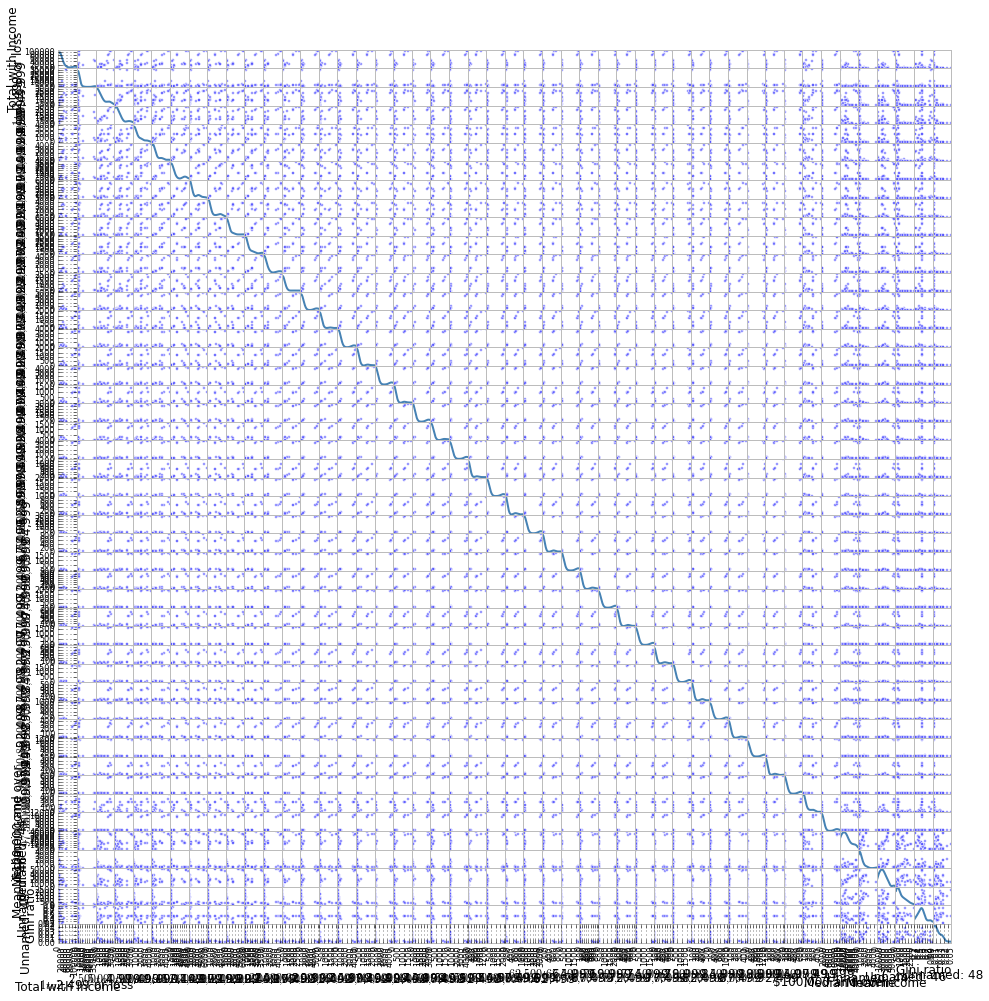

In [66]:
# Plotting the scatter matrix
from pandas.tools.plotting import scatter_matrix
scatter_matrix(allmales['all'], s=30, figsize=(16, 16), diagonal='kde')

> _**Since there are 49 columns present in the data, the output of the scatter matrix is not very useful.**_

In [5]:
#do the same for females
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

C:\Users\kiran.pv\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
# Performing checks on the data now specifically for Median Income, Mean Income columns
allmales['all'].info()
allfemales['all'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 49 columns):
Characteristic          48 non-null object
Total with Income       46 non-null float64
$1 to $2,499 or loss    46 non-null float64
$2,500 to $4,999        46 non-null float64
$5,000 to $7,499        46 non-null float64
$7,500 to $9,999        46 non-null float64
$10,000 to $12,499      46 non-null float64
$12,500 to $14,999      46 non-null float64
$15,000 to $17,499      46 non-null float64
$17,500 to $19,999      46 non-null float64
$20,000 to $22,499      46 non-null float64
$22,500 to $24,999      46 non-null float64
$25,000 to $27,499      46 non-null float64
$27,500 to $29,999      46 non-null float64
$30,000 to $32,499      46 non-null float64
$32,500 to $34,999      46 non-null float64
$35,000 to $37,499      46 non-null float64
$37,500 to $39,999      46 non-null float64
$40,000 to $42,499      46 non-null float64
$42,500 to $44,999      46 non-null float64
$45,000 to $47,499

> _**Now the data types of the Income related columns are shown as float and we can use these columns for further analysis withouth much worries.**_

##to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males by race (one data point per race)

##also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay
(make the plot and describe it in a "caption" in the cell below the plot)

In [7]:
# Checking for whether the first value corresponds to total median income
race = ['all', 'white', 'black', 'hispanic', 'asian']

for item in race:
    print allmales[item]['Characteristic'][1], allfemales[item]['Characteristic'][1]
    print allmales[item]['Median income'][1], allfemales[item]['Median income'][1]
    
# Looking for range values of median income    
print allmales[item]['Median income'].describe()
print allfemales[item]['Median income'].describe()

....Total ....Total
35228.0 22063.0
....Total ....Total
40122.0 23780.0
....Total ....Total
24855.0 20044.0
....Total ....Total
25411.0 17762.0
....Total ....Total
40153.0 24840.0
count       26.000000
mean     16477.500000
std      14461.987491
min       1384.000000
25%       7297.250000
50%      11569.000000
75%      15974.250000
max      45950.000000
Name: Median income, dtype: float64
count       26.000000
mean     12150.769231
std       9041.211416
min       1369.000000
25%       6233.750000
50%      10346.000000
75%      14156.000000
max      31802.000000
Name: Median income, dtype: float64


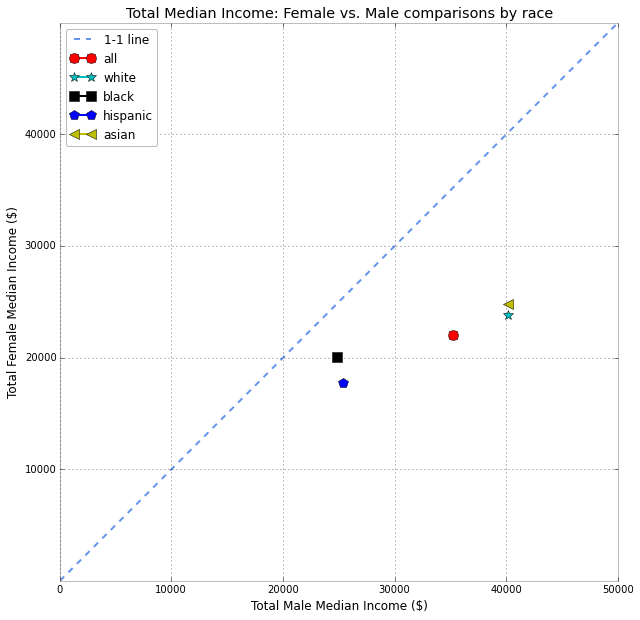

In [8]:
##pl.scatter[...]
x = range(50000)
y = range(50000)

pl.figure(figsize=(10,10))
pl.plot(x, y, c='cornflowerblue', ls= '--', lw=2, label='1-1 line')
pl.plot(allmales['all']['Median income'][1], allfemales['all']['Median income'][1], c='r', marker='o', markersize=10, label='all')
pl.plot(allmales['white']['Median income'][1], allfemales['white']['Median income'][1], c='c', marker='*', markersize=10, label='white')
pl.plot(allmales['black']['Median income'][1], allfemales['black']['Median income'][1], c='k', marker='s', markersize=10, label='black')
pl.plot(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1], c='b', marker='p', markersize=10, label='hispanic')
pl.plot(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1], c='y', marker='<', markersize=10, label='asian')

pl.xlabel('Total Male Median Income ($)')
pl.yticks([10000, 20000, 30000, 40000])
pl.ylabel('Total Female Median Income ($)')
pl.title('Total Median Income: Female vs. Male comparisons by race')
pl.legend(loc='best')

> _**From the above plot, it is clear that total female median income falls under the 1-1 line for all races. This indicates that on an average females are taking home less pay compared to males for similar kind of work.**_

#Now fit it with a line!
you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
if you want to use numpy (and you do not have to!) you can for example use 


pl.plot(newx,np.poly1d(np.ployfit(x,y,1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, like we did in class
    ...
    return y
def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals (difference b/w data and model **2)
    return residuals

you need an initial guess for the parameters, where you start searching. it has to be a single variable, so for 2 parameters make a list of 2 elements. the numbers inside do not have to be 0 and 1 - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

result = minimize(residuals, p0, args=(all_males, all_females))

in args i put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

In [9]:
#fit and plot here
maleMedInc = []
femaleMedInc= []

race = ['white', 'black', 'hispanic', 'asian']

for item in race:
    maleMedInc.append(allmales[item]['Median income'][1])
    femaleMedInc.append(allfemales[item]['Median income'][1])
    
maleMedInc = pd.DataFrame(maleMedInc)
femaleMedInc = pd.DataFrame(femaleMedInc)
data = pd.merge(maleMedInc, femaleMedInc, left_index=True, right_index=True)
data.rename(columns={'0_x':'maleMedInc', '0_y':'femaleMedInc'}, inplace=True)

print data

mod = smf.ols(formula='femaleMedInc ~ maleMedInc', data = data).fit()
print(mod.summary())

   maleMedInc  femaleMedInc
0       40122         23780
1       24855         20044
2       25411         17762
3       40153         24840
                            OLS Regression Results                            
Dep. Variable:           femaleMedInc   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     15.86
Date:                Tue, 20 Oct 2015   Prob (F-statistic):             0.0577
Time:                        01:14:28   Log-Likelihood:                -33.112
No. Observations:                   4   AIC:                             70.22
Df Residuals:                       2   BIC:                             69.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Con

C:\Users\kiran.pv\AppData\Local\Continuum\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n))


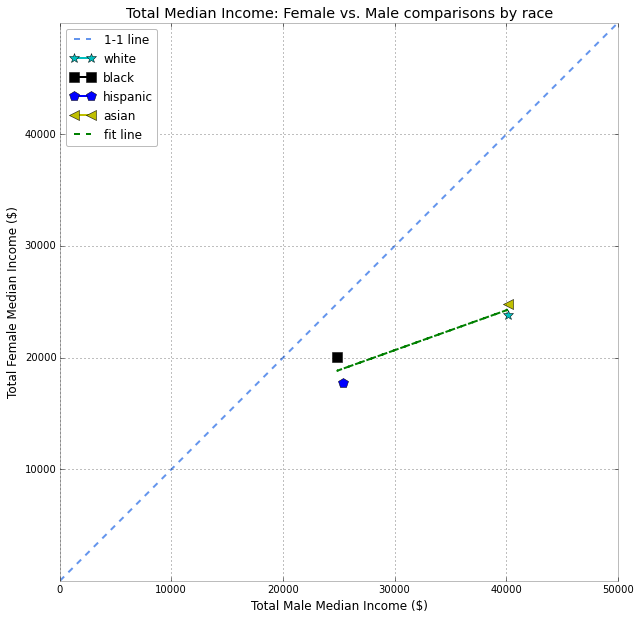

In [10]:
# Fitting ols line to total median incomes of all races
x = range(50000)
y = range(50000)

pl.figure(figsize=(10,10))
pl.plot(x, y, c='cornflowerblue', ls= '--', lw=2, label='1-1 line')
pl.plot(allmales['white']['Median income'][1], allfemales['white']['Median income'][1], c='c', marker='*', markersize=10, label='white')
pl.plot(allmales['black']['Median income'][1], allfemales['black']['Median income'][1], c='k', marker='s', markersize=10, label='black')
pl.plot(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1], c='b', marker='p', markersize=10, label='hispanic')
pl.plot(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1], c='y', marker='<', markersize=10, label='asian')
pl.plot(data['maleMedInc'], mod.predict(), c='g', ls='--', lw=2, label='fit line')

pl.xlabel('Total Male Median Income ($)')
pl.yticks([10000, 20000, 30000, 40000])
pl.ylabel('Total Female Median Income ($)')
pl.title('Total Median Income: Female vs. Male comparisons by race')
pl.legend(loc='best')

##it turns out that there is an analytical solution for the OLS regression it is coded below. please try to read the code and understand the formula! 


In [11]:
#this is the analytical best regression line. it can be proved (ask me about it if you want!)
cor = sp.stats.spearmanr(data['femaleMedInc'], data['maleMedInc'])
beta1=cor[0]*data['femaleMedInc'].std()/data['maleMedInc'].std()
beta0=data['femaleMedInc'].mean()-beta1*data['maleMedInc'].mean()

print beta1
print beta0

0.303388828077
11705.3297485


##and plot the line corresponding to the analytical regression to compare it with the result of your numerical one

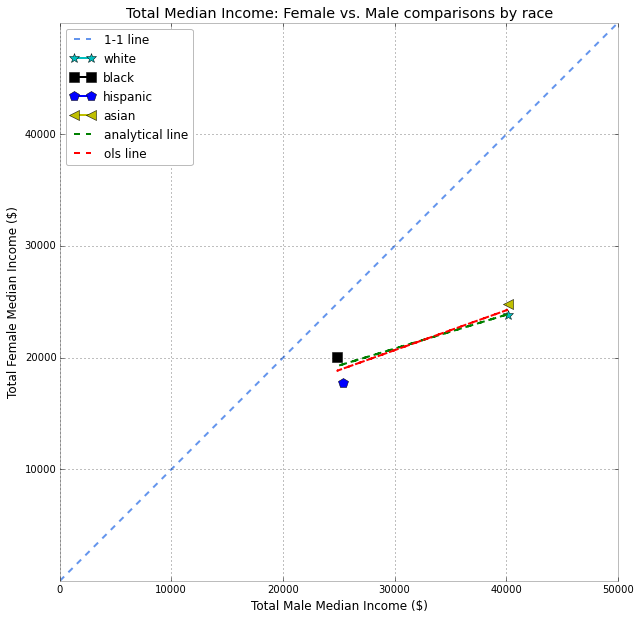

In [12]:
# Plotting ols, analytic line and total median incomes of all races
x = range(50000)
y = range(50000)

analyticy = (beta0 + beta1*data['maleMedInc'])

pl.figure(figsize=(10,10))
pl.plot(x, y, c='cornflowerblue', ls= '--', lw=2, label='1-1 line')
pl.plot(allmales['white']['Median income'][1], allfemales['white']['Median income'][1], c='c', marker='*', markersize=10, label='white')
pl.plot(allmales['black']['Median income'][1], allfemales['black']['Median income'][1], c='k', marker='s', markersize=10, label='black')
pl.plot(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1], c='b', marker='p', markersize=10, label='hispanic')
pl.plot(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1], c='y', marker='<', markersize=10, label='asian')
pl.plot(data['maleMedInc'], analyticy, c='g', ls= '--', lw=2, label='analytical line')
pl.plot(data['maleMedInc'], mod.predict(), c='r', ls='--', lw=2, label='ols line')

pl.xlim(0,50000)
pl.ylim(0,50000)
pl.xlabel('Total Male Median Income ($)')
pl.yticks([10000, 20000, 30000, 40000])
pl.ylabel('Total Female Median Income ($)')
pl.title('Total Median Income: Female vs. Male comparisons by race')
pl.legend(loc='best')

#this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

if you use one data point for source of income (along the 'Median income' column) and fit a line and the line fit is similar then the median income was representative fo all forms of income for this analysis

to unravel the data and concatenate them back together in a single array is a little complex (there may be easier way, this is just wha i came up with. if you have something better please share!!)
here ar a few lines of code that should do the trick. i used nu.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. i also masked the nan values. i used the numpy ma (masled array) package. ever array is associated by this package to a mask array of Bools [True....False...] of the same size. the 

In [13]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

#I am gonna create the mask int he next line. 
#the mask is True where either male or female value is Nan. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

In [14]:
#fit and plot [...]
finalMod = sm.OLS(all_females[~all_females.mask], sm.add_constant(all_males[~all_males.mask])).fit()
print finalMod.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1075.
Date:                Tue, 20 Oct 2015   Prob (F-statistic):           7.21e-77
Time:                        01:14:47   Log-Likelihood:                -1668.8
No. Observations:                 178   AIC:                             3342.
Df Residuals:                     176   BIC:                             3348.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1493.0394    351.359      4.249      0.0

In [40]:
#is the line fit similar? can you find any high legverage points?

> _**On comparing the linear regression output of all median income values with the earlier model of using only total median incomes for all races, there is not much difference in terms of the model performance. R-squared values seem to be similar for both scenarios.**_

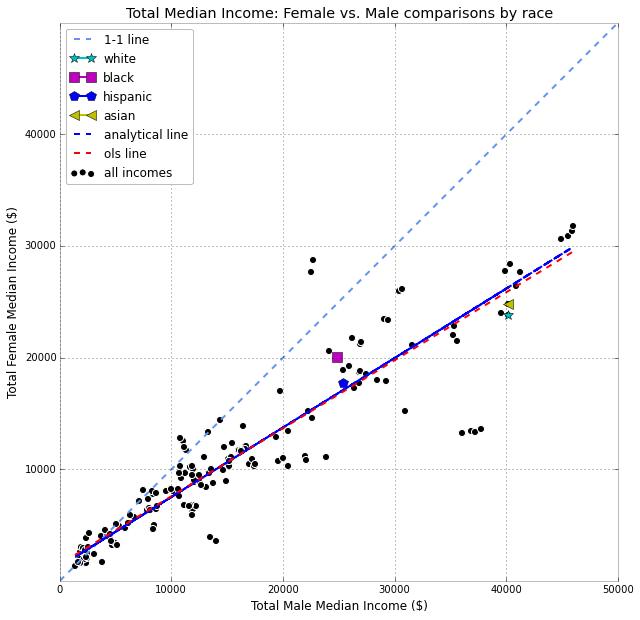

In [15]:
# Plotting ols line, analytics line and total median incomes of all races
x = range(50000)
y = range(50000)

cor = sp.stats.spearmanr(all_females[~all_females.mask], all_males[~all_males.mask])
beta1=cor[0]*all_females[~all_females.mask].std()/all_males[~all_males.mask].std()
beta0=all_females[~all_females.mask].mean()-beta1*all_males[~all_males.mask].mean()
analyticy = (beta0 + beta1*all_males[~all_males.mask])

pl.figure(figsize=(10,10))
pl.scatter(all_males[~all_males.mask], all_females[~all_females.mask], c='k', s=50, marker='o', label='all incomes')
pl.plot(x, y, c='cornflowerblue', ls= '--', lw=2, label='1-1 line')
pl.plot(allmales['white']['Median income'][1], allfemales['white']['Median income'][1], c='c', marker='*', markersize=10, label='white')
pl.plot(allmales['black']['Median income'][1], allfemales['black']['Median income'][1], c='m', marker='s', markersize=10, label='black')
pl.plot(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1], c='b', marker='p', markersize=10, label='hispanic')
pl.plot(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1], c='y', marker='<', markersize=10, label='asian')

pl.plot(all_males[~all_males.mask], analyticy, c='b', ls= '--', lw=2, label='analytical line')

lower = np.min(all_males[~all_males.mask])
upper = np.max(all_males[~all_males.mask])
x1 = np.linspace(lower, upper, 10)
beta1 = finalMod.params[1]
beta0 = finalMod.params[0]
predicted = x1*beta1+beta0
pl.plot(x1, predicted, c='r', ls='--', lw=2, label='ols line')

pl.xlim(0,50000)
pl.ylim(0,50000)
pl.xlabel('Total Male Median Income ($)')
pl.yticks([10000, 20000, 30000, 40000])
pl.ylabel('Total Female Median Income ($)')
pl.title('Total Median Income: Female vs. Male comparisons by race')
pl.legend(loc='best')

##Now pick a stipend, maybe your ideal stipend? 
##and predict what a woman in a position where a man recieves your ideal stipend would make



In [16]:
# Lets say the ideal male stipend is 40000
# Female stipend can be predicted using the model parameters
x = 40000
beta1 = finalMod.params[1]
beta0 = finalMod.params[0]
predicted = x*beta1+beta0
print "For equivalent of male stipend of 40000, a female would make:", predicted

For equivalent of male stipend of 40000, a female would make: 25853.8603858


##lastly do you have any comments about what these data tell us about race? how you would go about analyzing race differences with these data? (just a few sentences)

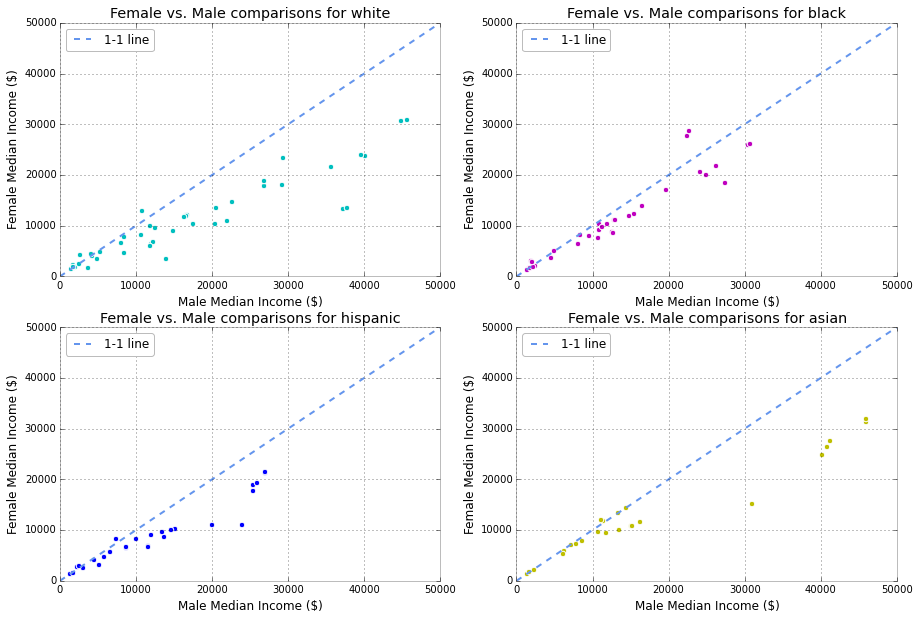

In [17]:
# Plotting median incomes of male vs female across all races
x = range(50000)
y = range(50000)

pl.figure(figsize=(15,10))
pl.subplot(2,2,1)
pl.plot(x, y, c='cornflowerblue', ls= '--', lw=2, label='1-1 line')
pl.scatter(allmales['white']['Median income'], allfemales['white']['Median income'], c='c', s=30)
pl.xlim(0,50000)
pl.ylim(0,50000)
pl.xlabel('Male Median Income ($)')
pl.ylabel('Female Median Income ($)')
pl.title('Female vs. Male comparisons for white')
pl.legend(loc='best')

pl.subplot(2,2,2)
pl.plot(x, y, c='cornflowerblue', ls= '--', lw=2, label='1-1 line')
pl.scatter(allmales['black']['Median income'], allfemales['black']['Median income'], c='m', s=30)
pl.xlim(0,50000)
pl.ylim(0,50000)
pl.xlabel('Male Median Income ($)')
pl.ylabel('Female Median Income ($)')
pl.title('Female vs. Male comparisons for black')
pl.legend(loc='best')

pl.subplot(2,2,3)
pl.plot(x, y, c='cornflowerblue', ls= '--', lw=2, label='1-1 line')
pl.scatter(allmales['hispanic']['Median income'], allfemales['hispanic']['Median income'], c='b', s=30)
pl.xlim(0,50000)
pl.ylim(0,50000)
pl.xlabel('Male Median Income ($)')
pl.ylabel('Female Median Income ($)')
pl.title('Female vs. Male comparisons for hispanic')
pl.legend(loc='best')

pl.subplot(2,2,4)
pl.plot(x, y, c='cornflowerblue', ls= '--', lw=2, label='1-1 line')
pl.scatter(allmales['asian']['Median income'], allfemales['asian']['Median income'], c='y', s=30)
pl.xlim(0,50000)
pl.ylim(0,50000)
pl.xlabel('Male Median Income ($)')
pl.ylabel('Female Median Income ($)')
pl.title('Female vs. Male comparisons for asian')
pl.legend(loc='best')

> _**In general, across black race we can see that there is not much differences in terms of equivalent median income for a particular sector as all the values lie around the 1-1 line. When it comes to other races, we notice that on an average females are paid less compared to males across sectors except at lower median income levels. One other thing we can see is that both white and asian races seem to attarct higher median income values in comparison with black and hispanic races.**_